In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Generate 100 data points between -10 and 10
X = np.linspace(-10, 10, 100)
# Define a polynomial relationship: y = 2x^2 + 3x + 5 + noise
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 15, size=len(X))

# Create a DataFrame
df_poly = pd.DataFrame({'X': X, 'Y': y})

: 

In [6]:
display(df_poly)

,X,Y
0,-10.000000,187.019022
1,-9.797980,158.381165
2,-9.595960,153.497457
3,-9.393939,163.848840
4,-9.191919,165.797052
...,...,...
95,9.191919,176.815915
96,9.393939,207.318141
97,9.595960,216.663531
98,9.797980,248.193773


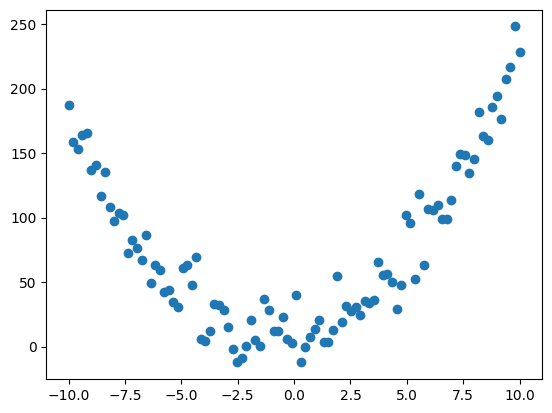

In [9]:
plt.scatter(x=df_poly['X'], y=df_poly['Y'])

In [46]:
X = df_poly[['X']]

y = df_poly['Y']

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [48]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [49]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

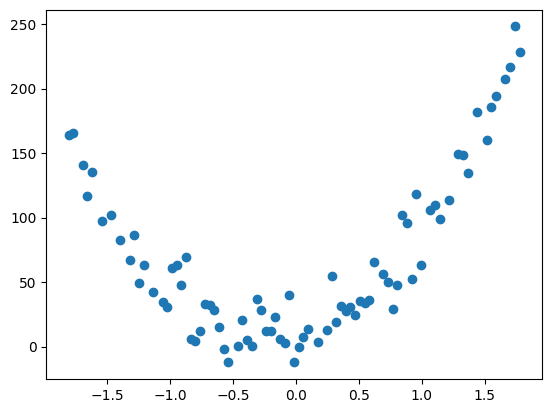

In [55]:
plt.scatter(x=x_train, y=y_train)

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly = PolynomialFeatures(include_bias=True, degree=2)

x_poly_train = poly.fit_transform(X=x_train)
x_poly_test = poly.fit_transform(X=x_test)

In [64]:
from sklearn.linear_model import LinearRegression

Linear = LinearRegression(n_jobs=-1)
polynomial = LinearRegression(n_jobs=-1)

Linear.fit(X=x_train, y=y_train)

polynomial.fit(X=x_poly_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [74]:
y_pred = Linear.predict(x_test)
y_poly_pred = polynomial.predict(x_poly_test)

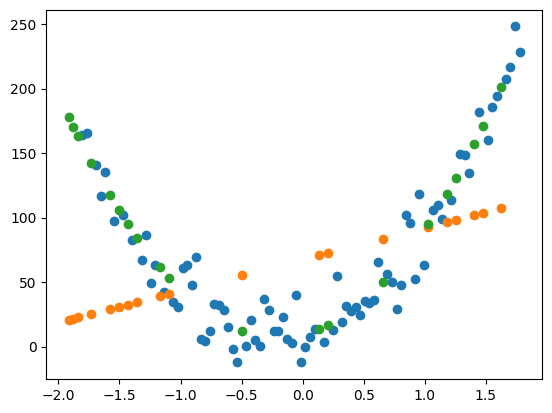

In [76]:
plt.scatter(x=x_train, y=y_train)
plt.scatter(x=x_test, y=y_pred)
plt.scatter(x=x_test, y=y_poly_pred)

In [82]:
#Recidual

recidual_linear = y_pred - y_test

recidual_poly = y_poly_pred - y_test

In [83]:
import seaborn as sns

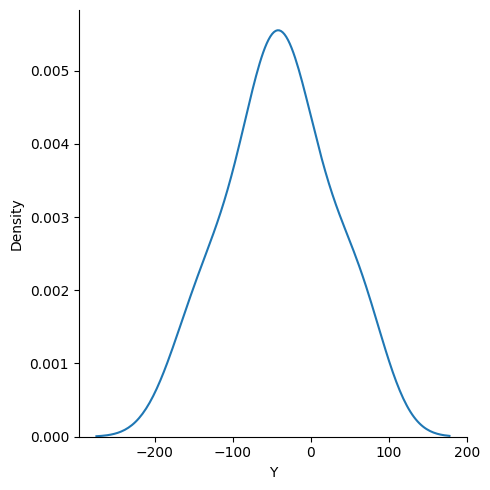

In [84]:
sns.displot(recidual_linear,kind='kde')

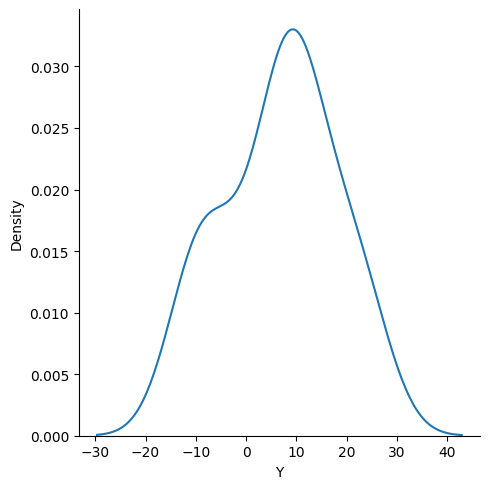

In [85]:
sns.displot(recidual_poly,kind='kde')

In [86]:
from sklearn.metrics import r2_score

linear_r2 = r2_score(y_pred=y_pred, y_true=y_test)

poly_r2 = r2_score(y_pred=y_poly_pred, y_true=y_test)

In [87]:
print(f"The linear model accuracy :{linear_r2} and the polynomial model accuracy :{poly_r2}")

The linear model accuracy :-0.7952762629823935 and the polynomial model accuracy :0.9501920206283823


In [88]:
from sklearn.pipeline import Pipeline

piplines_ml = Pipeline(
    [
        ('Scalar', StandardScaler()),
        ('Model', LinearRegression())
    ]
)

In [89]:
piplines_ml.fit(x_train,y_train)

,steps,"[('Scalar', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [90]:
piplines_ml.predict([[24]])

array([654.31936828])